In [1]:
import torch
import torch.nn as nn
from universalNet import *
import matplotlib.pyplot as plt

In [2]:
# Initialize network
hparams = {'tau': 1,
           'seed': 42,
           'dales_law': True}

params_dict = {'layer0':
                   {'E': {'n': 7}},
               'layer1':
                   {'E': {'n': 5,
                         'activation': 'softplus',
                         'inputs': ['layer0.E']},
                    'I': {'n': 1}},
               'layer2':
                   {'E': {'n': 21,
                         'bias': True,
                         'inputs': ['layer0.E', 'layer1.E'], 
                         'learning_rule': 'Oja'}}}

model = universalNet(params_dict, **hparams)

# model = universalNet(tau = 1, seed = 42, dales_law = True)

100%|██████████| 10/10 [00:00<00:00, 83.40it/s]


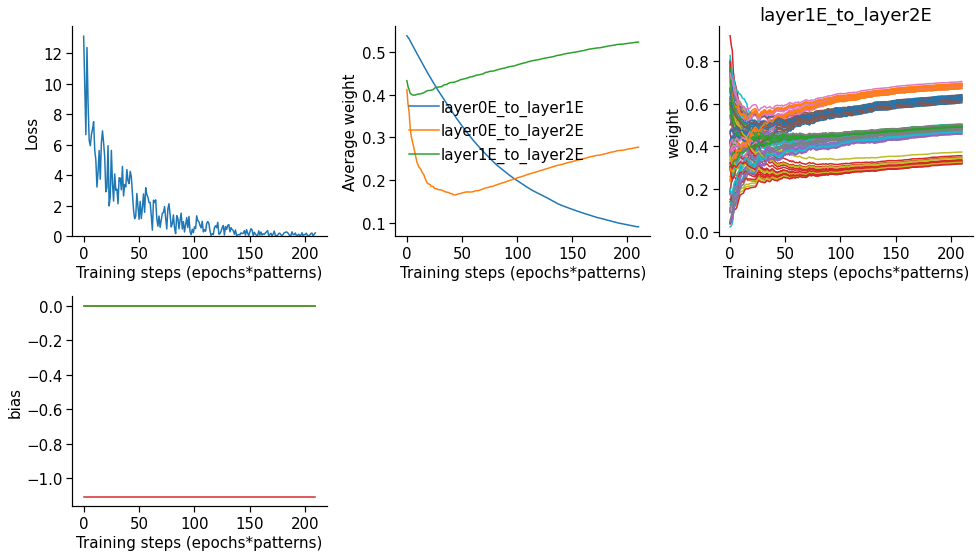

In [3]:
# Train network
all_patterns = n_hot_patterns(n=2,length=7)
all_targets = torch.eye(21)

model.train(num_epochs = 10,
            all_patterns = all_patterns,
            all_targets = all_targets,
            lr = 0.01,
            num_timesteps = 1,
            plot = True)

In [4]:
# optim = Adam(
#     [
#         {"params": model.fc.parameters(), "lr": 1e-3},
#         {"params": model.agroupoflayer.parameters()},
#         {"params": model.lastlayer.parameters(), "lr": 4e-2},
#     ],
#     lr=5e-4,
# )